In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df=pd.read_csv('Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [3]:
df.shape

(2639, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


### 13 columns in total, there are null values in some columns, 4 features with float values, 2 with integer values and 7 with categorical type values.

In [5]:
# duplicated values
df.duplicated().sum()

161

In [6]:
# dropping duplicates
df=df.drop_duplicates()

In [7]:
# checking for null values
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

# data preprocessing

In [8]:
# imputing below columns with mode
cols_mode=['DOJ', 'AGE', 'RATINGS']
for col in cols_mode:
  df[col]=df[col].fillna(df[col].mode()[0])


In [9]:
# imputing below columns with median
cols_median=['LEAVES USED', 'LEAVES REMAINING']
for col in cols_median:
  df[col]=df[col].fillna(df[col].median())

In [10]:
# dropping columns insignificant for analysis
cols_drop=['FIRST NAME', 'LAST NAME']
df=df.drop(columns=cols_drop)

In [11]:
df.isnull().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

# feature engineering

In [12]:
# converting date columns to datetime datatype
cols_date=['DOJ', 'CURRENT DATE']
for col in cols_date:
  df[col]=pd.to_datetime(df[col])

In [13]:
# making a new feature: years_experience
df['years_experience']=df['CURRENT DATE'].dt.year-df['DOJ'].dt.year

In [14]:
# dropping date columns
df.drop(columns=cols_date, inplace=True)

In [15]:
df.sample(20)

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
1839,F,Analyst,25.0,41668,Finance,27.0,3.0,5.0,3,2
440,F,Analyst,24.0,45482,Management,26.0,4.0,4.0,0,3
15,F,Analyst,21.0,44812,IT,16.0,8.0,5.0,0,2
1002,F,Analyst,24.0,40961,Management,22.0,8.0,5.0,1,3
1689,F,Analyst,25.0,46767,IT,15.0,15.0,3.0,2,3
1797,F,Associate,30.0,83971,Marketing,29.0,1.0,4.0,8,2
790,M,Associate,28.0,71673,Finance,29.0,1.0,3.0,3,3
774,M,Analyst,21.0,48343,Web,30.0,0.0,4.0,0,3
1122,M,Analyst,25.0,48915,Operations,17.0,13.0,2.0,2,2
2369,M,Senior Analyst,28.0,58745,Finance,19.0,11.0,3.0,2,3


In [16]:
df.to_csv('salary_data_cleaned.csv', index=False)

# EDA 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv('Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [19]:
# descriptive statistics
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


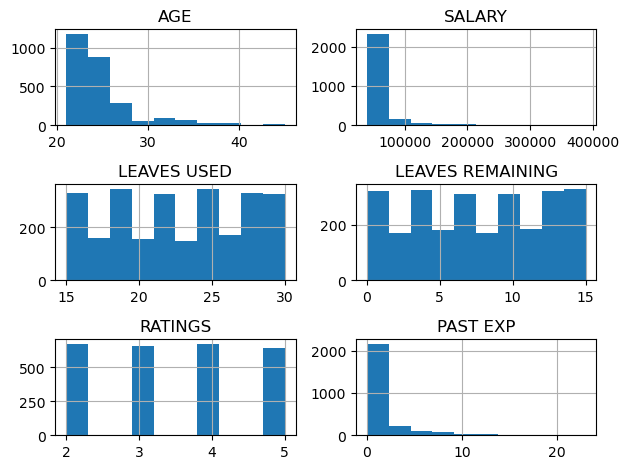

In [20]:
# distribution across cnumerical columns
df.hist()
plt.tight_layout()

In [21]:
cat_cols= [x for x in df.columns if df[x].dtype == 'object']
cat_cols

['FIRST NAME',
 'LAST NAME',
 'SEX',
 'DOJ',
 'CURRENT DATE',
 'DESIGNATION',
 'UNIT']

<Axes: >

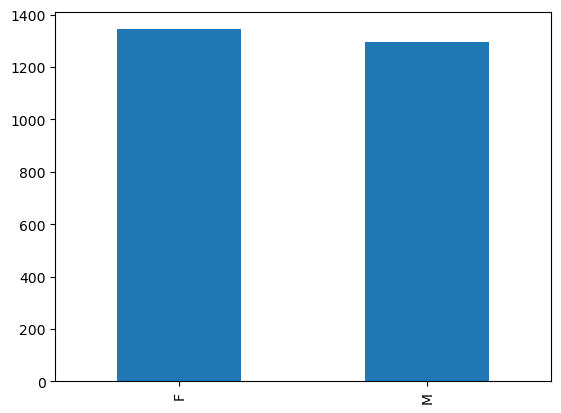

In [22]:
# gender distribution
df['SEX'].value_counts().plot(kind='bar')

<Axes: >

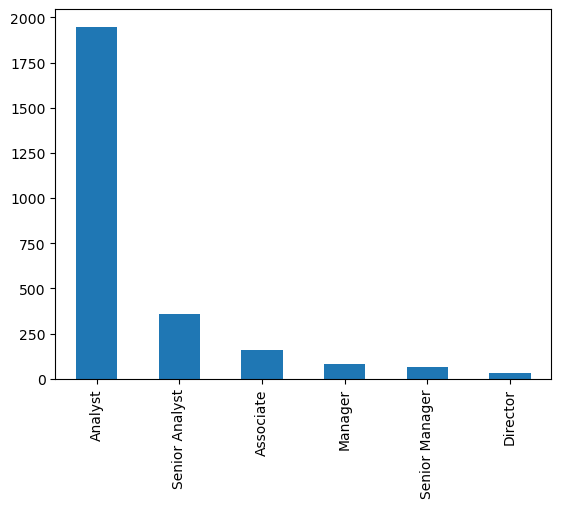

In [23]:
# designation distribution
df['DESIGNATION'].value_counts().plot(kind='bar')

<Axes: >

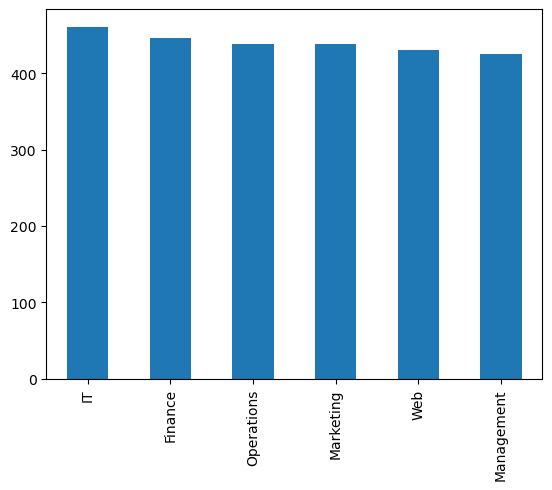

In [24]:
# unit distribution
df['UNIT'].value_counts().plot(kind='bar')

In [25]:
# pairplot analysis on processed data
df2= pd.read_csv('salary_data_cleaned.csv')

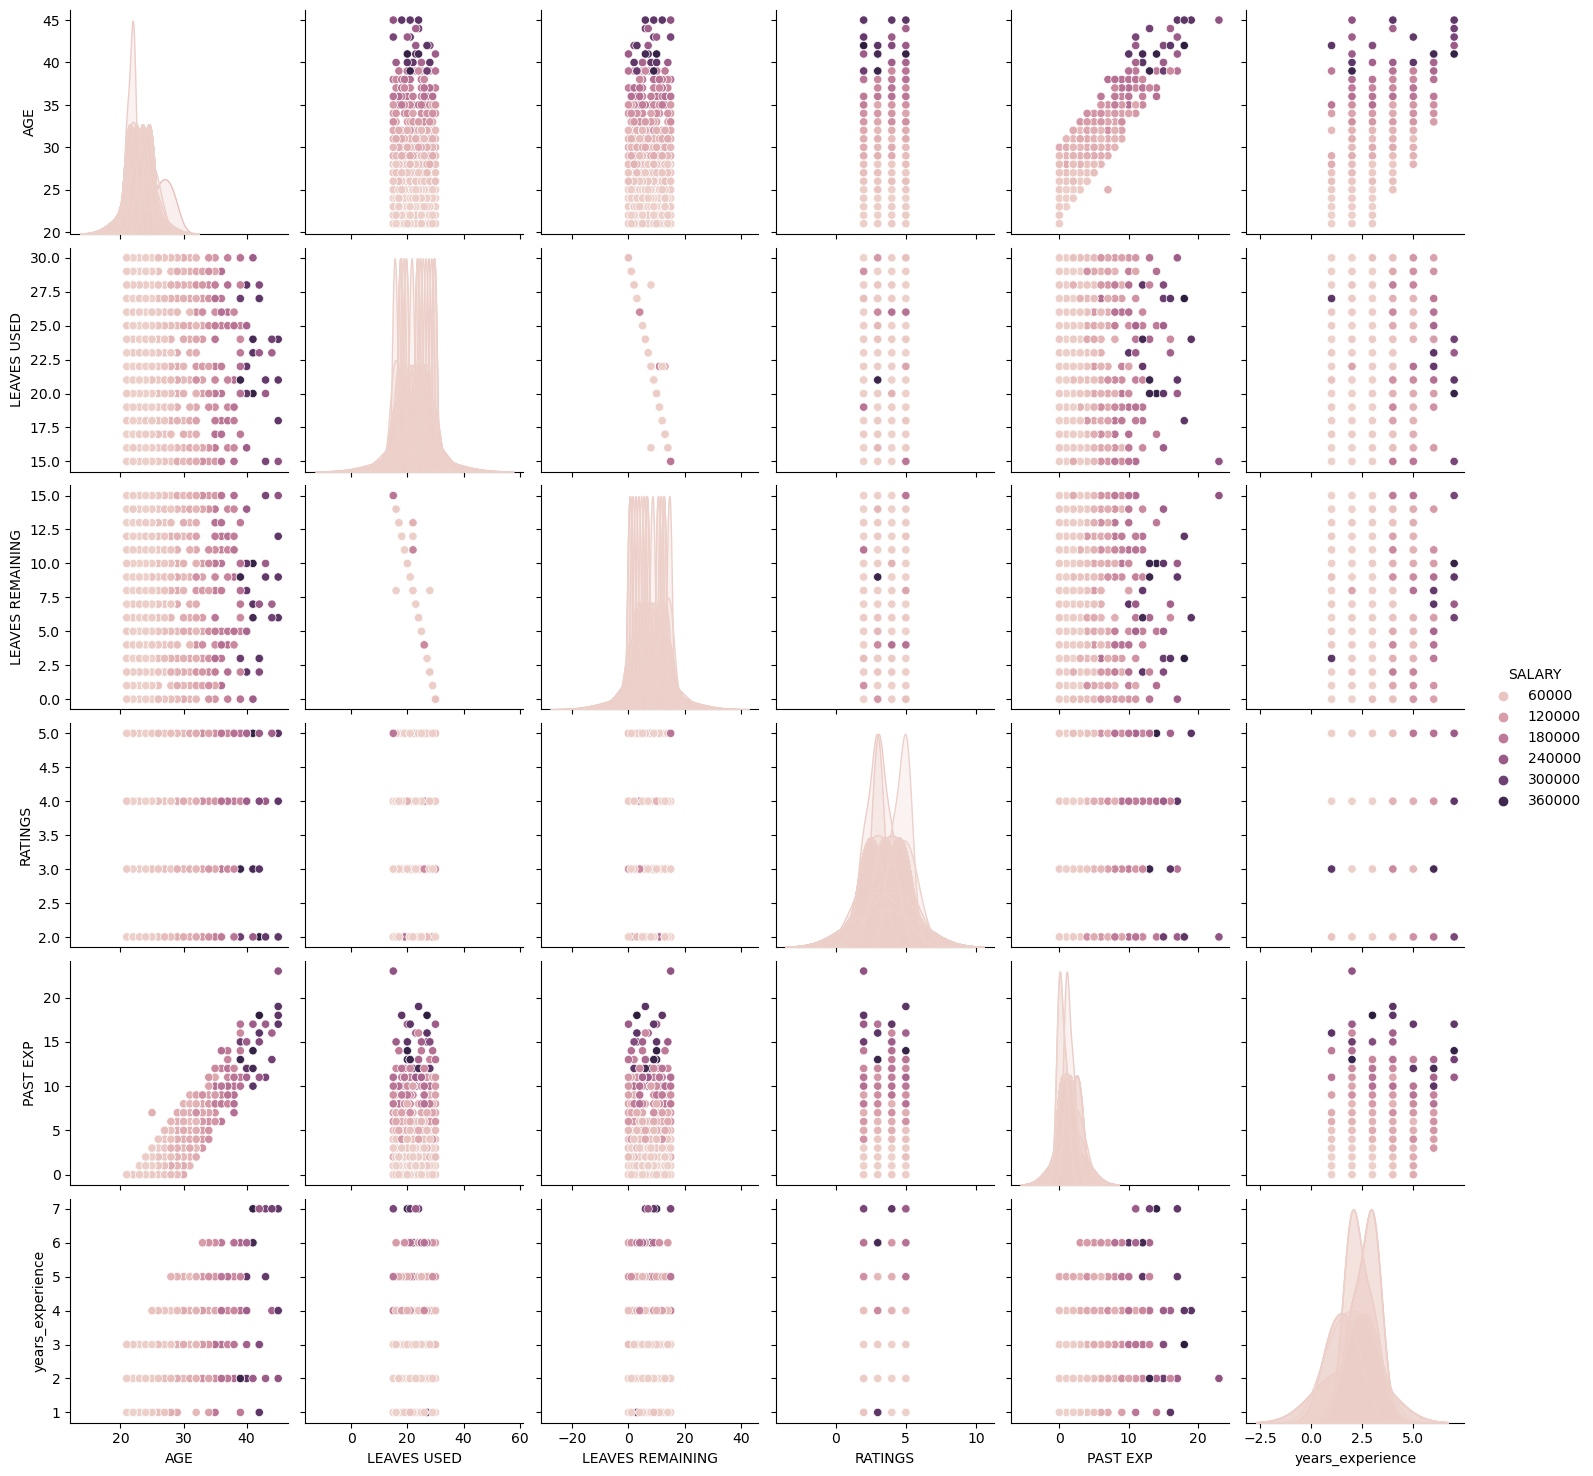

In [26]:
sns.pairplot(df2, hue='SALARY')

<Axes: >

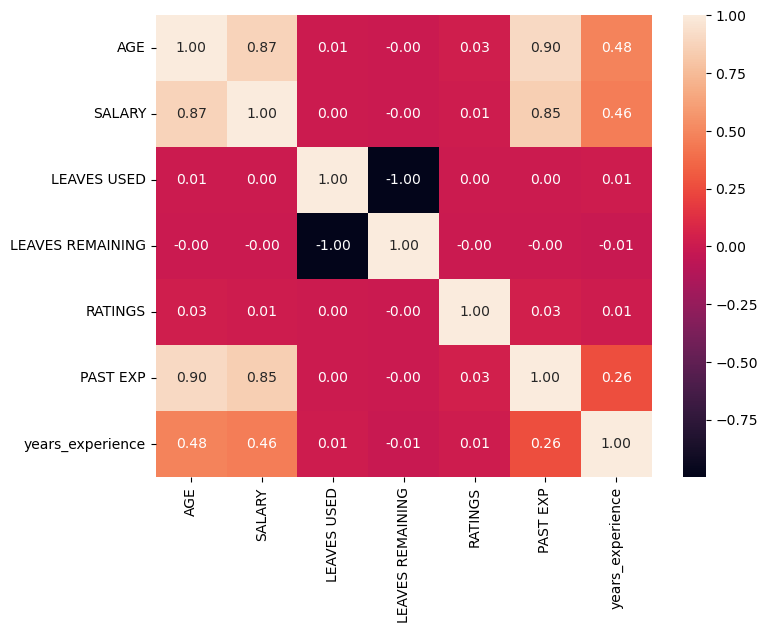

In [27]:
plt.figure(figsize=(8, 6))
corr=df2.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")

In [28]:
# data handling and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preparation libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# model training libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# metric library
from sklearn import metrics

# setting a random seed for reproducability
np.random.seed(1111)

In [29]:
# splitting the data into dependent and independent variables
X=df2.drop('SALARY',axis=1)
y=df2['SALARY']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1734, 9), (744, 9), (1734,), (744,))

# Encoding data

In [32]:
df2.DESIGNATION.value_counts()

Analyst           1854
Senior Analyst     301
Associate          156
Manager             79
Senior Manager      61
Director            27
Name: DESIGNATION, dtype: int64

In [33]:
df2.SEX.value_counts()

F    1259
M    1219
Name: SEX, dtype: int64

In [34]:
df.UNIT.value_counts()

IT            461
Finance       446
Operations    438
Marketing     438
Web           431
Management    425
Name: UNIT, dtype: int64

In [35]:
# label encoding sex and unit column
label_cols=['SEX', 'UNIT']
for cols in label_cols:
  le=LabelEncoder()
  x_train[cols]= le.fit_transform(x_train[cols])
  x_test[cols]= le.transform(x_test[cols])

In [36]:
# ordinal encoding designation column
desired_order=[['Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Manager', 'Director']]
ordinal_encoder = OrdinalEncoder(categories=desired_order)
x_train['DESIGNATION'] = ordinal_encoder.fit_transform(x_train[['DESIGNATION']])
x_test['DESIGNATION'] = ordinal_encoder.transform(x_test[['DESIGNATION']])

In [37]:
x_train.head()

,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
646,0,0.0,25.0,1,24.0,6.0,3.0,1,3
1074,1,0.0,22.0,3,24.0,6.0,2.0,0,2
244,0,0.0,25.0,1,27.0,3.0,5.0,1,3
2071,1,0.0,25.0,3,26.0,4.0,2.0,2,3
1780,1,0.0,23.0,0,23.0,7.0,3.0,0,3


# Feature selection

In [38]:
# selecting best 6 features
selector= SelectKBest(score_func = f_regression, k=6)
x_train_new = selector.fit_transform(x_train, y_train)
x_test_new = selector.transform(x_test)

In [39]:
# extracting feature names
selector.get_feature_names_out()

array(['SEX', 'DESIGNATION', 'AGE', 'UNIT', 'PAST EXP',
       'years_experience'], dtype=object)

In [40]:
# reassigning the selected features to training and test dataset
x_train_new= pd.DataFrame(x_train_new, columns=selector.get_feature_names_out())
x_test_new= pd.DataFrame(x_test_new, columns=selector.get_feature_names_out())

In [41]:
x_train_new.head()

,SEX,DESIGNATION,AGE,UNIT,PAST EXP,years_experience
0,0.0,0.0,25.0,1.0,1.0,3.0
1,1.0,0.0,22.0,3.0,0.0,2.0
2,0.0,0.0,25.0,1.0,1.0,3.0
3,1.0,0.0,25.0,3.0,2.0,3.0
4,1.0,0.0,23.0,0.0,0.0,3.0


# Correlation study

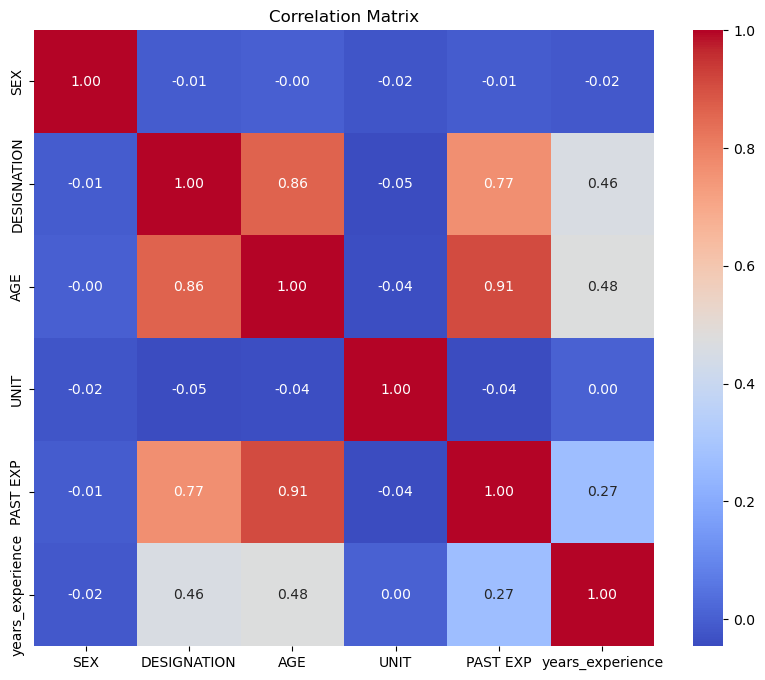

In [42]:
corr_matrix= x_train_new.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [43]:
# dropping columns with correlation exceeding [-0.8,0.8]
x_train_new = x_train.drop(columns=['AGE'])
x_test_new = x_test.drop(columns=['AGE'])

# MODEL   COMPARISON   AND    SELECTION


## Helper functions to streamline the process

In [44]:
def scorer(model_name, dictionary_name, y_test, pred):
  '''
    A metric scorer for regression tasks

    This function takes the following arguments:
    - model_name: a string representing the name of the model.
    - dictionary_name: a dictionary where the scores will be stored.
    - y_test: a pandas Series or array representing the true target values for the test set.
    - pred: a pandas Series or array representing the predicted target values for the test set.

    The function calculates Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R2 score for the model,
    stores them in the provided dictionary under the key of the model name, and returns the dictionary.

  '''
  from sklearn import metrics
  dictionary_name[model_name]={'Mean Absolute Error' : metrics.mean_absolute_error(y_test, pred),
                              'Mean Squared Error' : metrics.mean_squared_error(y_test, pred),
                              'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred)),
                              'R2 score' : metrics.r2_score(y_test,pred)}
  return dictionary_name[model_name]

In [45]:
def train_test_score_compare(model, x_train, x_test, y_train, y_test):
  from sklearn import metrics
  model.fit(x_train, y_train)

  # Predict
  y_pred_train = model.predict(x_train_new)
  y_pred_test = model.predict(x_test_new)

  # Evaluate the model
  mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  r2_train = r2_score(y_train, y_pred_train)

  mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
  mse_test = mean_squared_error(y_test, y_pred_test)
  r2_test = r2_score(y_test, y_pred_test)

  print(f"{model} values:")
  print("Train MAE:", mae_train)
  print("Train MSE:", mse_train)
  print("Train R2:", r2_train)
  print("Test MAE:", mae_test)
  print("Test MSE:", mse_test)
  print("Test R2:", r2_test)

## Defining a `scores` dataframe to store model scores.

In [46]:
# defining a score dataframe for model scores for comparison later
scores = pd.DataFrame()
pd.set_option('display.float_format', lambda x: '%.12f' % x)

## Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=2, max_iter=10000)
lasso.fit(x_train_new,y_train)
pred=lasso.predict(x_test_new)

In [48]:
scorer('Lasso Regression', scores, y_test, pred)

Mean Absolute Error            9093.064984996821
Mean Squared Error        161629352.924977838993
Root Mean Squared Error       12713.353331241047
R2 score                          0.823429504510
Name: Lasso Regression, dtype: float64

In [49]:
train_test_score_compare(lasso, x_train_new, x_test_new, y_train, y_test)

Lasso(alpha=2, max_iter=10000) values:
Train MAE: 9838.065044055249
Train MSE: 268445718.97444075
Train R2: 0.825646177667023
Test MAE: 9093.064984996821
Test MSE: 161629352.92497784
Test R2: 0.8234295045101442


## Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train_new,y_train)
pred=rf.predict(x_test_new)

In [51]:
scorer('Random Forest Regressor', scores, y_test, pred)

Mean Absolute Error           4434.525715587130
Mean Squared Error        53427576.224574737251
Root Mean Squared Error       7309.416955173288
R2 score                         0.941633537250
Name: Random Forest Regressor, dtype: float64

In [52]:
train_test_score_compare(rf, x_train_new, x_test_new, y_train, y_test)

RandomForestRegressor() values:
Train MAE: 1784.4180150560223
Train MSE: 11047564.441979023
Train R2: 0.9928246757099065
Test MAE: 4458.201735812425
Test MSE: 53882851.29501894
Test R2: 0.9411361761994815


## Gradient Boosting Machine

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train_new,y_train)
pred=gbr.predict(x_test_new)

In [54]:
scorer('Gradient Boosting Regressor', scores, y_test, pred)

Mean Absolute Error           4096.126598626272
Mean Squared Error        46235380.812073223293
Root Mean Squared Error       6799.660345346172
R2 score                         0.949490584777
Name: Gradient Boosting Regressor, dtype: float64

In [55]:
train_test_score_compare(gbr, x_train_new, x_test_new, y_train, y_test)

GradientBoostingRegressor() values:
Train MAE: 3566.792913437127
Train MSE: 24584753.521906987
Train R2: 0.9840323557252678
Test MAE: 4088.937718146057
Test MSE: 45589950.21463612
Test R2: 0.9501956794785129


## XGboost

In [56]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(x_train_new,y_train)
pred=xgb.predict(x_test_new)

In [57]:
scorer('XGBoost Regressor', scores, y_test, pred)

Mean Absolute Error           4660.627037130376
Mean Squared Error        69785339.797168895602
Root Mean Squared Error       8353.762014635615
R2 score                         0.923763649344
Name: XGBoost Regressor, dtype: float64

In [58]:
train_test_score_compare(xgb, x_train_new, x_test_new, y_train, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) values:
Train MAE: 1487.5832161908882
Train MSE: 3671618.4132514964
Train R2: 0.9976153067110022
Test MAE: 4660.627037130376
Test MSE: 69785339.7971689
Test R2: 0.9237636493438572


## Support Vector Regression

In [59]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_new,y_train)
pred=svr.predict(x_test_new)

In [60]:
scorer('Support Vector Regression', scores, y_test, pred)

Mean Absolute Error            13653.628635801580
Mean Squared Error        1019839494.191852211952
Root Mean Squared Error        31934.925930583464
R2 score                          -0.114114246892
Name: Support Vector Regression, dtype: float64

In [61]:
train_test_score_compare(svr, x_train_new, x_test_new, y_train, y_test)

SVR() values:
Train MAE: 15126.221591272975
Train MSE: 1677338011.253133
Train R2: -0.08942059021705795
Test MAE: 13653.62863580158
Test MSE: 1019839494.1918522
Test R2: -0.11411424689154415


## K-nearest Neighbours Regression

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train_new,y_train)
pred=knn.predict(x_test_new)

In [63]:
scorer('K-Nearest Neighbour Regression', scores, y_test, pred)

Mean Absolute Error            6409.883064516129
Mean Squared Error        157125339.566935479641
Root Mean Squared Error       12534.964681519270
R2 score                          0.828349872351
Name: K-Nearest Neighbour Regression, dtype: float64

In [64]:
train_test_score_compare(knn, x_train_new, x_test_new, y_train, y_test)

KNeighborsRegressor() values:
Train MAE: 5474.302537485582
Train MSE: 139117139.63024223
Train R2: 0.9096442843669538
Test MAE: 6409.883064516129
Test MSE: 157125339.56693548
Test R2: 0.8283498723513222


# Visualizing score to select the best performing model

In [65]:
scores


,Lasso Regression,Random Forest Regressor,Gradient Boosting Regressor,XGBoost Regressor,Support Vector Regression,K-Nearest Neighbour Regression
Mean Absolute Error,9093.064984996821,4434.525715587130,4096.126598626272,4660.627037130376,13653.628635801580,6409.883064516129
Mean Squared Error,161629352.924977838993,53427576.224574737251,46235380.812073223293,69785339.797168895602,1019839494.191852211952,157125339.566935479641
Root Mean Squared Error,12713.353331241047,7309.416955173288,6799.660345346172,8353.762014635615,31934.925930583464,12534.964681519270
R2 score,0.823429504510,0.941633537250,0.949490584777,0.923763649344,-0.114114246892,0.828349872351


In [66]:
scores_trans= scores.T


Text(0.5, 1.0, 'Mean Absolute Error')

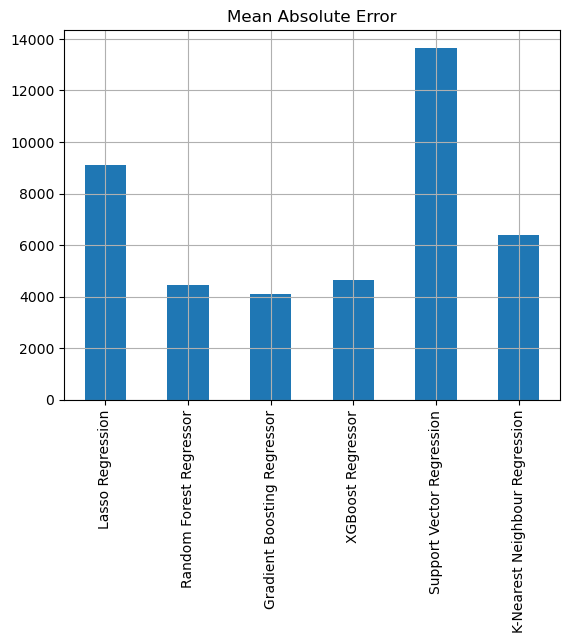

In [67]:
scores_trans['Mean Absolute Error'].plot(kind= 'bar')
plt.grid(True)
plt.title('Mean Absolute Error')

Text(0.5, 1.0, 'Mean Squared Error')

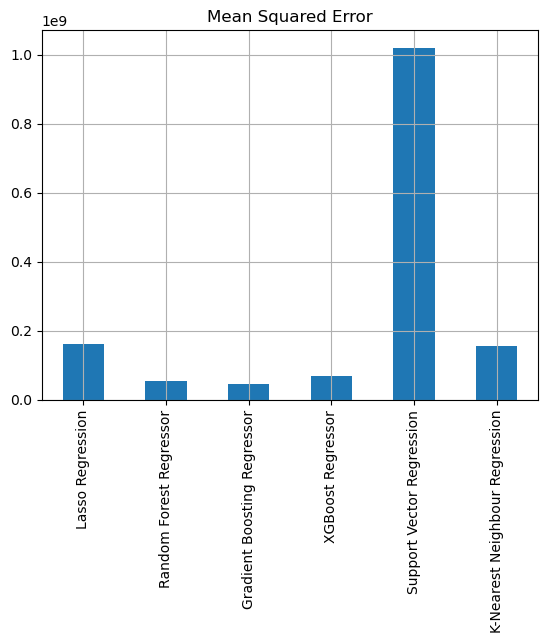

In [68]:
scores_trans['Mean Squared Error'].plot(kind= 'bar')
plt.grid(True)
plt.title('Mean Squared Error')

Text(0.5, 1.0, 'Root Mean Squared Error')

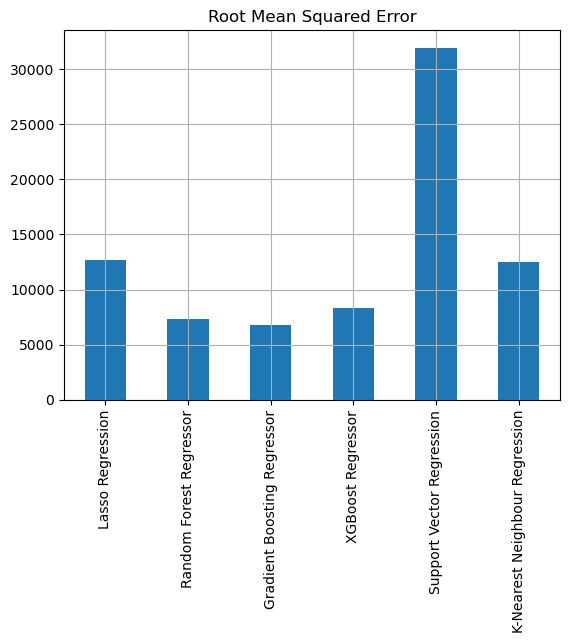

In [69]:
scores_trans['Root Mean Squared Error'].plot(kind= 'bar')
plt.grid(True)
plt.title('Root Mean Squared Error')

Text(0.5, 1.0, 'R2 score')

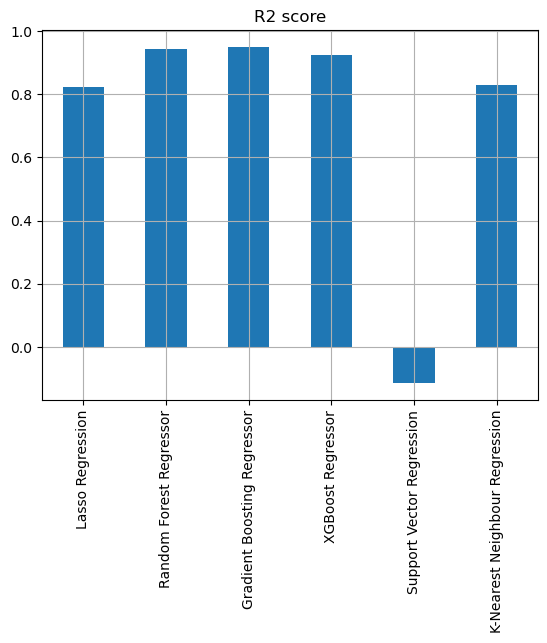

In [70]:
scores_trans['R2 score'].plot(kind= 'bar')
plt.grid(True)
plt.title('R2 score')

# Best performing model:

 




### `Gradient Boosting Regressor` with an R2 score of `0.949490584777`.




# PIPELINE      BUILDING


In [71]:
# data handling and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preparation libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# model
from sklearn.ensemble import GradientBoostingRegressor

# evaluation
from sklearn import metrics

# Pipeline and transformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# random seed
np.random.seed(1111)

In [72]:
# loading the dataset
df=pd.read_csv('salary_data_cleaned.csv')
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
0,F,Analyst,21.000000000000,44570,Finance,24.000000000000,6.000000000000,2.000000000000,0,2
1,F,Associate,25.000000000000,89207,Web,22.000000000000,13.000000000000,2.000000000000,7,3
2,F,Analyst,21.000000000000,40955,Finance,23.000000000000,7.000000000000,3.000000000000,0,2
3,F,Analyst,22.000000000000,45550,IT,22.000000000000,8.000000000000,3.000000000000,0,3
4,M,Analyst,25.000000000000,43161,Operations,27.000000000000,3.000000000000,2.000000000000,3,2


In [73]:
df=df.drop(columns=['AGE'])

### Splitting the data

In [74]:
# splitting the data into dependent and independent variables
X=df.drop('SALARY',axis=1)
y=df['SALARY']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1734, 8), (744, 8), (1734,), (744,))

# Creating a pipeline

In [77]:
# preprocessing transformer
ordinal_columns = ['DESIGNATION']
desired_order= [['Analyst', 'Associate', 'Senior Analyst', 'Manager', 'Senior Manager', 'Director']]
ordinal_columns_no_order = ['SEX', 'UNIT']
trans1 = ColumnTransformer(
                  [('ordinal-encoding-order-based', OrdinalEncoder(categories = desired_order), ordinal_columns),
                   ('ordinal-encoding-no-order', OrdinalEncoder(), ordinal_columns_no_order)],
                   remainder='passthrough')

trans2 = SelectKBest(f_regression, k=5)

trans3 = GradientBoostingRegressor()

In [78]:
# creating a pipeline
pipeline = Pipeline(steps=[('preprocessing', trans1),
                           ('feature_selection', trans2),
                           ('model', trans3)])

In [79]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal-encoding-order-based',
                                                  OrdinalEncoder(categories=[['Analyst',
                                                                              'Associate',
                                                                              'Senior '
                                                                              'Analyst',
                                                                              'Manager',
                                                                              'Senior '
                                                                              'Manager',
                                                                              'Director']]),
                                                  ['DESIGNATION']),
                                                 ('ordinal-encoding-no-order',
                                                  OrdinalEncoder(),
                                                  ['SEX', 'UNIT'])])),
                ('feature_selection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x000001840E3D2C00>)),
                ('model', GradientBoostingRegressor())])

# Hyperparameter tuning

In [80]:
# parameters for hyperparameter tuning

param_dist = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'model__max_depth': [2, 3, 4, 5],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.6, 0.8, 1.0]
}


In [81]:
# hyperparameter tuning using RandomizedSearchCV
random_search= RandomizedSearchCV(pipeline, param_dist, n_iter=100, cv=3, scoring= 'r2', n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal-encoding-order-based',
                                                                               OrdinalEncoder(categories=[['Analyst',
                                                                                                           'Associate',
                                                                                                           'Senior '
                                                                                                           'Analyst',
                                                                                                           'Manager',
                                                                                                           'Senior '
                                                                                                           'Manager',
                                                                                                           'Director']]),
                                                                               ['DESIGNATION']),
                                                                              ('ordinal-encoding-no-order',
                                                                               OrdinalEncoder(),
                                                                               ['SEX',
                                                                                'UNIT'])])),
                                             ('f...
                                                          score_func=<function f_regression at 0x000001840E3D2C00>)),
                                             ('model',
                                              GradientBoostingRegressor())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.03,
                                                                 0.05, 0.1],
                                        'model__max_depth': [2, 3, 4, 5],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 200],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   scoring='r2')

In [82]:
print('Best Parameters: ', random_search.best_params_)
print('Best Score: ', random_search.best_score_)

Best Parameters:  {'model__subsample': 0.6, 'model__n_estimators': 50, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_depth': 4, 'model__learning_rate': 0.1}
Best Score:  0.9455888862723102


### generating a new pipeline with the best parameters

In [83]:
# extracting the SelectKBest feature selection step from the best model
best_model = random_search.best_estimator_
select_k_best = best_model.named_steps['feature_selection']

In [84]:
# extracting the names of the best features selected through SelectKBest
mask = select_k_best.get_support()

feature_names = x_train.columns
selected_features = feature_names[mask]

In [85]:
# updating training and test datasets with only the selected best features
x_train_new = x_train[selected_features]
x_test_new = x_test[selected_features]

In [86]:
x_train_new.head()

,SEX,DESIGNATION,UNIT,PAST EXP,years_experience
646,F,Analyst,IT,1,3
1074,M,Analyst,Marketing,0,2
244,F,Analyst,IT,1,3
2071,M,Analyst,Marketing,2,3
1780,M,Analyst,Finance,0,3


# Final Pipeline

In [87]:
# creating the final pipeline
final_pipeline = Pipeline(steps=[('preprocessing', trans1),
                                 ('model', GradientBoostingRegressor())])
# extracting best paramteres
best_params= random_search.best_params_

# updating pipeline with the best parameters
final_pipeline.set_params(**best_params)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal-encoding-order-based',
                                                  OrdinalEncoder(categories=[['Analyst',
                                                                              'Associate',
                                                                              'Senior '
                                                                              'Analyst',
                                                                              'Manager',
                                                                              'Senior '
                                                                              'Manager',
                                                                              'Director']]),
                                                  ['DESIGNATION']),
                                                 ('ordinal-encoding-no-order',
                                                  OrdinalEncoder(),
                                                  ['SEX', 'UNIT'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=4, min_samples_leaf=4,
                                           min_samples_split=10,
                                           n_estimators=50, subsample=0.6))])

In [88]:
x_train_new

,SEX,DESIGNATION,UNIT,PAST EXP,years_experience
646,F,Analyst,IT,1,3
1074,M,Analyst,Marketing,0,2
244,F,Analyst,IT,1,3
2071,M,Analyst,Marketing,2,3
1780,M,Analyst,Finance,0,3
...,...,...,...,...,...
1942,M,Analyst,IT,1,1
152,F,Analyst,Finance,0,3
674,F,Analyst,Management,2,2
311,M,Analyst,Web,0,2


In [89]:
final_pipeline.fit(x_train_new , y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal-encoding-order-based',
                                                  OrdinalEncoder(categories=[['Analyst',
                                                                              'Associate',
                                                                              'Senior '
                                                                              'Analyst',
                                                                              'Manager',
                                                                              'Senior '
                                                                              'Manager',
                                                                              'Director']]),
                                                  ['DESIGNATION']),
                                                 ('ordinal-encoding-no-order',
                                                  OrdinalEncoder(),
                                                  ['SEX', 'UNIT'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=4, min_samples_leaf=4,
                                           min_samples_split=10,
                                           n_estimators=50, subsample=0.6))])

# Exporting the pipeline

In [90]:
import pickle
pickle.dump(final_pipeline, open('final-pipeline-salary-prediction.pkl', 'wb'))

In [91]:
# test_input for pipeline testing in the next notebook
num=np.random.randint(1000)
a = x_train_new.iloc[num,:]# random number for index value
{x : [value] for x, value in a.items()}

{'SEX': ['F'],
 'DESIGNATION': ['Analyst'],
 'UNIT': ['Finance'],
 'PAST EXP': [2],
 'years_experience': [2]}

In [92]:
y_train.iloc[num]

41685

In [93]:
# import libraries
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

In [95]:
# load the pipeline
pipe=pickle.load(open('final-pipeline-salary-prediction.pkl', 'rb'))

In [96]:
# sample test input from x train itself
test_input = pd.DataFrame({'SEX': ['F'],
 'DESIGNATION': ['Analyst'],
 'UNIT': ['Marketing'],
 'PAST EXP': [0],
 'years_experience': [3]})
print(test_input)

  SEX DESIGNATION       UNIT  PAST EXP  years_experience
0   F     Analyst  Marketing         0                 3


In [97]:
# making prediction using the pipeline
pipe.predict(test_input)

array([45233.39584925])

- actual value: `49432`
- predicted value: `45233.4`

# Predicting x_test values using pipeline

In [99]:
df=pd.read_csv('salary_data_cleaned.csv')
df

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,years_experience
0,F,Analyst,21.000000000000,44570,Finance,24.000000000000,6.000000000000,2.000000000000,0,2
1,F,Associate,25.000000000000,89207,Web,22.000000000000,13.000000000000,2.000000000000,7,3
2,F,Analyst,21.000000000000,40955,Finance,23.000000000000,7.000000000000,3.000000000000,0,2
3,F,Analyst,22.000000000000,45550,IT,22.000000000000,8.000000000000,3.000000000000,0,3
4,M,Analyst,25.000000000000,43161,Operations,27.000000000000,3.000000000000,2.000000000000,3,2
...,...,...,...,...,...,...,...,...,...,...
2473,F,Senior Manager,36.000000000000,185977,Management,15.000000000000,15.000000000000,5.000000000000,10,5
2474,F,Analyst,23.000000000000,45758,IT,17.000000000000,13.000000000000,2.000000000000,0,2
2475,F,Analyst,21.000000000000,47315,Web,29.000000000000,1.000000000000,5.000000000000,0,2
2476,F,Analyst,24.000000000000,45172,Web,23.000000000000,7.000000000000,3.000000000000,1,2


In [100]:
# only retaining the columns which are required for prediction
cols=[ 'SEX', 'DESIGNATION', 'UNIT', 'PAST EXP',  'years_experience', 'SALARY']
df=df[cols]
df

,SEX,DESIGNATION,UNIT,PAST EXP,years_experience,SALARY
0,F,Analyst,Finance,0,2,44570
1,F,Associate,Web,7,3,89207
2,F,Analyst,Finance,0,2,40955
3,F,Analyst,IT,0,3,45550
4,M,Analyst,Operations,3,2,43161
...,...,...,...,...,...,...
2473,F,Senior Manager,Management,10,5,185977
2474,F,Analyst,IT,0,2,45758
2475,F,Analyst,Web,0,2,47315
2476,F,Analyst,Web,1,2,45172


In [101]:
# splitting the data into dependent and independent variables
x=df.drop('SALARY', axis=1)
y=df['SALARY']

In [102]:
# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [103]:
# predicting values
pred= pipe.predict(x_test)

In [104]:
# custom made helper function to compute and return metrics
def scorer(model_name, dictionary_name, y_test, pred):
  '''
    A metric scorer for regression tasks

    This function takes the following arguments:
    - model_name: a string representing the name of the model.
    - dictionary_name: a dictionary where the scores will be stored.
    - y_test: a pandas Series or array representing the true target values for the test set.
    - pred: a pandas Series or array representing the predicted target values for the test set.

    The function calculates Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R2 score for the model,
    stores them in the provided dictionary under the key of the model name, and returns the dictionary.

  '''
  from sklearn import metrics
  import numpy as np
  dictionary_name[model_name]={'Mean Absolute Error' : metrics.mean_absolute_error(y_test, pred),
                              'Mean Squared Error' : metrics.mean_squared_error(y_test, pred),
                              'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred)),
                              'R2 score' : metrics.r2_score(y_test,pred)}
  return dictionary_name[model_name]

In [105]:
score={}
scorer('Gradient Boosting Machine', score, y_test, pred)

{'Mean Absolute Error': 4601.611177108621,
 'Mean Squared Error': 79190445.02110903,
 'Root Mean Squared Error': 8898.901337868008,
 'R2 score': 0.9655049816223277}

## The model has an R2 score of `0.9674823146258182` on the x_test dataset.